<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana15/Metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

In [4]:
def GetPlot():

  fig = plt.figure(figsize=(15,4))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)

  return ax,ax1

In [5]:
#GetPlot()

In [6]:
def Likelihood(x,p):
  mean,std = p
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))

In [43]:
def Likelihood2(x,p):
  return 1/(p[0]*(1+x**2))

In [50]:
def Metropolis(Likelihood,p,x0=0,a=1,NSteps=int(100),burned=500):

  x = np.zeros(NSteps)
  x[0] = x0

  accept = 0

  for i in range(NSteps-1):

    # Donde estoy?
    p0 = Likelihood(x[i],p)

    # Doy un paso
    xn1 = x[i] + a*np.random.uniform(-1,1)

    # A donde me movi?
    p1 = Likelihood(xn1,p)

    # Probabilidad de aceptacion
    alpha = np.minimum(1, p1/p0)

    g = np.random.rand()

    if g < alpha:
      x[i+1] = xn1 # ME muevo
    else:
      x[i+1] = x[i]

    if i % 10000 == 0:
      clear_output(wait=True)
      ax,ax1 = GetPlot()

      ax.plot(x[:i+1],'-',color='k')
      _x = np.linspace(np.min(x),np.max(x),30)
      _like = Likelihood(_x,p)
      ax1.plot(_x,_like,lw=3,color='r')
      ax1.hist(x[:i+1],bins=50,density=True)
      plt.show()

  return x[burned:]

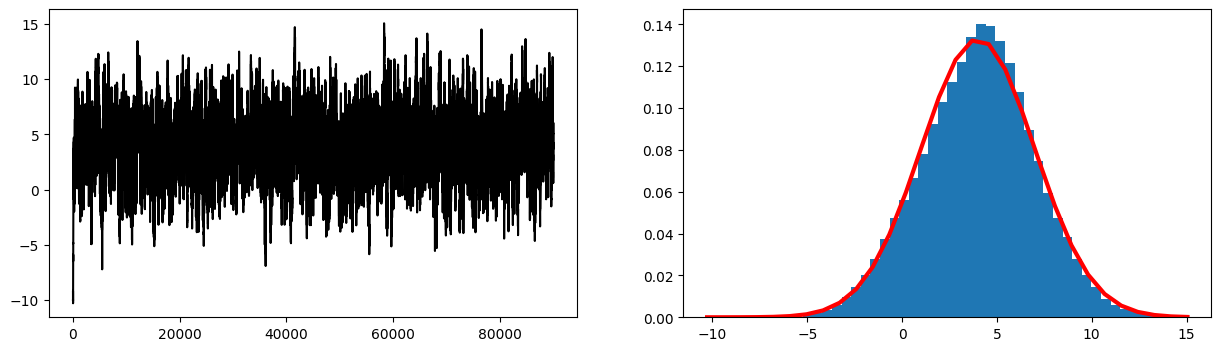

In [51]:
p0 = np.array([4,3])
x = Metropolis(Likelihood,p0,x0=-10,a=1,NSteps=100000)

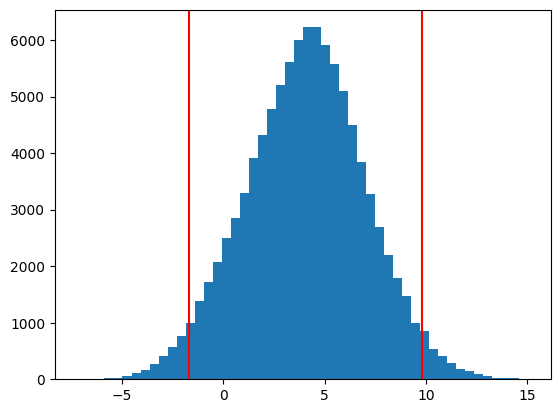

In [56]:
_ = plt.hist(x,bins=50)
plt.axvline(np.percentile(x,97.5),color='r')
plt.axvline(np.percentile(x,2.75),color='r')

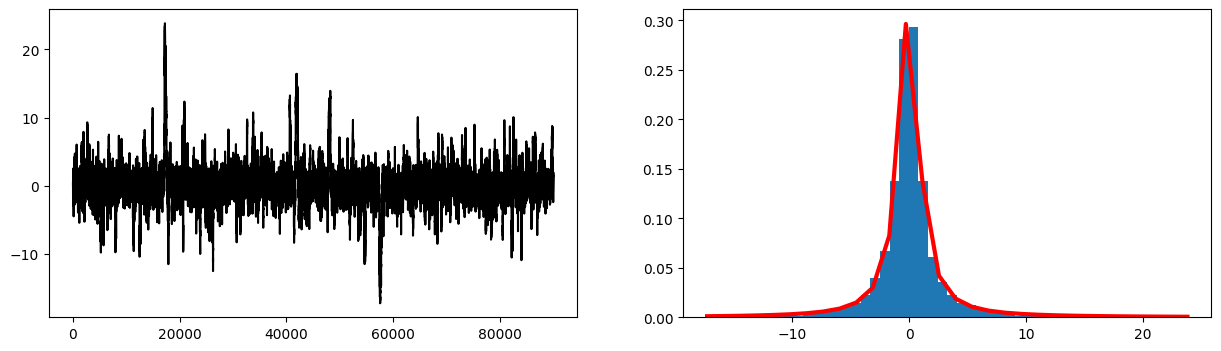

In [59]:
p0 = np.array([np.pi])
x = Metropolis(Likelihood2,p0,x0=0,a=1,NSteps=100000)